In [1]:
library(Seurat)
library(dplyr)
library(PALMO)

Attaching SeuratObject


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: grid

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”


In [2]:
mtx <- readRDS('exp918_mtx.rds')
meta <- readRDS('exp918_meta.rds')

In [3]:
so <- CreateSeuratObject(counts = mtx, meta.data = meta)

In [4]:
so

An object of class Seurat 
18082 features across 429366 samples within 1 assay 
Active assay: RNA (18082 features, 0 variable features)

In [5]:
so <- NormalizeData(so) %>% FindVariableFeatures() %>% ScaleData() %>% RunPCA()

Centering and scaling data matrix

PC_ 1 
Positive:  CD247, TRBC1, LEF1, CCR7, CD69, TRAT1, MAL, CD27, NELL2, MYC 
	   PYHIN1, SAMD3, CTSW, HIST1H1D, AQP3, HIST1H1C, CENPM, IL2RB, KLRK1, GATA3 
	   KLRG1, GBP5, CD40LG, SH2D2A, ICOS, ARID5B, DPP4, PRDM1, MYBL1, CD8A 
Negative:  CLEC7A, SERPINA1, TNFAIP2, PLXNB2, EMILIN2, NCF2, SPI1, CST3, LILRB2, IFI30 
	   HCK, LRRC25, MNDA, MEFV, HK3, LYZ, TYMP, CLEC12A, CD68, FGL2 
	   NFAM1, CD300E, SLC11A1, PILRA, PRAM1, LRP1, S100A9, TGFBI, ZNF385A, CSF3R 
PC_ 2 
Positive:  CD79A, MS4A1, PAX5, NIBAN3, BANK1, IGHM, CD22, FCRL1, IGHD, FCRL2 
	   TNFRSF13C, BLK, POU2AF1, BCL11A, RALGPS2, RUBCNL, IGKC, CD79B, WDFY4, FCRLA 
	   CD19, FCER2, OSBPL10, SWAP70, AFF3, COBLL1, ADAM28, BLNK, CIITA, CDK14 
Negative:  SPN, ANXA1, CD247, SRGN, ITGB2, ADGRE5, CTSW, PRF1, SAMD3, ID2 
	   S100A4, CST7, NKG7, IL2RB, GZMA, MYO1F, SYNE1, CD300A, DOK2, FOSL2 
	   CCL5, KLRD1, GNLY, KLRK1, MYBL1, TGFBR3, AOAH, ADGRG1, S100A10, S100A6 
PC_ 3 
Positive:  NKG7, PRF1, GNLY,

In [6]:
ref <- SeuratDisk::LoadH5Seurat(file = '../pbmc_multimodal.h5seurat')

Registered S3 method overwritten by 'SeuratDisk':
  method            from  
  as.sparse.H5Group Seurat

Validating h5Seurat file

Initializing ADT with data

Adding counts for ADT

Adding variable feature information for ADT

Adding miscellaneous information for ADT

Initializing SCT with data

Adding counts for SCT

Adding variable feature information for SCT

Adding miscellaneous information for SCT

Adding reduction apca

Adding cell embeddings for apca

Adding feature loadings for apca

Adding miscellaneous information for apca

Adding reduction aumap

Adding cell embeddings for aumap

Adding miscellaneous information for aumap

Adding reduction pca

Adding cell embeddings for pca

Adding feature loadings for pca

Adding miscellaneous information for pca

Adding reduction spca

Adding cell embeddings for spca

Adding feature loadings for spca

Adding miscellaneous information for spca

Adding reduction umap

Adding cell embeddings for umap

Adding miscellaneous information for uma

In [7]:
anchors <- FindTransferAnchors(
    reference = ref,
    query = so,
    normalization.method = "SCT",
    reference.reduction = "spca",
    dims = 1:50)

Normalizing query using reference SCT model

Projecting cell embeddings

Finding neighborhoods

Finding anchors

	Found 16540 anchors



In [8]:
so <- TransferData(anchorset = anchors, reference = ref, query = so,
              refdata = list(
              celltype.l1 = "celltype.l1",
              celltype.l2 = "celltype.l2",
              celltype.l3 = "celltype.l3"))

Finding integration vectors

Finding integration vector weights

Predicting cell labels

Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from predictionscorecelltype.l1_ to predictionscorecelltypel1_”
Predicting cell labels

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from predictionscorecelltype.l2_ to predictionscorecelltypel2_”
Predicting cell labels

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from predictionscorecelltype.l3_ to predictionscorecelltypel3_”


In [9]:
head(so@meta.data)

,orig.ident,nCount_RNA,nFeature_RNA,donor,well,donor2,predicted.celltype.l1.score,predicted.celltype.l1,predicted.celltype.l2.score,predicted.celltype.l2,predicted.celltype.l3.score,predicted.celltype.l3
,<chr>,<dbl>,<int>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>
AAACAAGCACCGGTAGACTTTAGG-1_1,Exp00918_w1_BL05013-033,6654,3198,BL05013,w1,BL05013-033,0.9792252,CD4 T,0.9671556,CD4 TCM,0.7877114,CD4 TCM_3
AAACAAGCACTAAGGCACTTTAGG-1_1,Exp00918_w1_BL05013-033,5889,2988,BL05013,w1,BL05013-033,0.6921315,CD8 T,0.6844454,CD8 Naive,0.5411529,CD8 Naive
AAACAAGCACTCCCTTACTTTAGG-1_1,Exp00918_w1_BL05013-033,14577,4339,BL05013,w1,BL05013-033,1.0000000,Mono,1.0000000,CD14 Mono,1.0000000,CD14 Mono
AAACAAGCATTCCTTTACTTTAGG-1_1,Exp00918_w1_BL05013-033,11459,4099,BL05013,w1,BL05013-033,1.0000000,Mono,1.0000000,CD16 Mono,1.0000000,CD16 Mono
AAACAAGCATTTAGCCACTTTAGG-1_1,Exp00918_w1_BL05013-033,5790,2967,BL05013,w1,BL05013-033,0.9687596,CD8 T,0.9640880,CD8 Naive,0.5331445,CD8 Naive
AAACCAATCAATGTTCACTTTAGG-1_1,Exp00918_w1_BL05013-033,20776,5697,BL05013,w1,BL05013-033,1.0000000,Mono,0.9637864,CD14 Mono,0.9637864,CD14 Mono


In [10]:
table(so$donor)


BL05013 BL05045 BL05113 BL05759 BL05760 PB02183 
  80512   80718   76120   78030   83144   30842 

In [11]:
table(so$donor2)


BL05013-033 BL05013-034 BL05013-035 BL05013-036 BL05013-037 BL05013-038 
       6135        6513        6452        6529        6601        6600 
BL05013-039 BL05013-040 BL05013-041 BL05013-042 BL05013-043 BL05013-044 
       5883        6224        6782        6840        7193        8760 
BL05045-048 BL05045-049 BL05045-050 BL05045-051 BL05045-052 BL05045-053 
       6757        7212        7069        5682        7328        6351 
BL05045-054 BL05045-055 BL05045-056 BL05045-057 BL05045-058 BL05045-059 
       6540        5824        6178        6761        7548        7468 
BL05113-013 BL05113-014 BL05113-015 BL05113-016 BL05113-017 BL05113-018 
       6744        6064        6545        6089        6138        6330 
BL05113-019 BL05113-020 BL05113-021 BL05113-022 BL05113-023 BL05113-024 
       4996        5776        6292        7883        7295        5968 
BL05759-020 BL05759-021 BL05759-022 BL05759-023 BL05759-024 BL05759-025 
       6289        6797        6381        6226   

In [12]:
so$Sample <- so$donor2
so$Replicate <- so$donor2
so$Pool_Well <- so$well
so$Donor <- so$donor

In [13]:
palmo_obj <- createPALMOobject(anndata=so@meta.data, data=so)

Fri Mar 22 18:46:00 2024: The PALMO object is created.

Fri Mar 22 18:46:00 2024: For outout files, the output directory is created.



In [14]:
palmo_obj <- annotateMetadata(data_object=palmo_obj,
    sample_column= "Sample",
    donor_column= "Donor",
    time_column= "Pool_Well")

In [15]:
palmo_obj <- mergePALMOdata(data_object=palmo_obj, datatype="singlecell")

In [16]:
palmo_obj <- avgExpCalc(data_object=palmo_obj,
assay="RNA", group_column="predicted.celltype.l2")
head(palmo_obj@curated[["anndata"]]) #merged annotation data
head(palmo_obj@curated[["data"]]) #scRNA average expression data

Fri Mar 22 18:46:06 2024: Calculating scRNA Average expression

Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 5.5 GiB”
Fri Mar 22 18:47:08 2024: scRNA Average expression finished

Fri Mar 22 18:47:08 2024: Keeping genes with avg expression >0



,Sample,Sample_group,group,orig.ident,nCount_RNA,nFeature_RNA,donor,well,donor2,predicted.celltype.l1.score,⋯,predicted.celltype.l2,predicted.celltype.l3.score,predicted.celltype.l3,Replicate,Pool_Well,Donor,PTID,Time,predicted.celltype.l2.1,Sample_group_i
,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<chr>,<chr>,<chr>,<dbl>,⋯,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
BL05013_033:B_intermediate,BL05013_033,BL05013_033:B_intermediate,B_intermediate,Exp00918_w1_BL05013-033,6654,3198,BL05013,w1,BL05013-033,0.9792252,⋯,CD4 TCM,0.7877114,CD4 TCM_3,BL05013-033,w1,BL05013,BL05013,w1,B_intermediate,B_intermediate:BL05013
BL05013_033:B_memory,BL05013_033,BL05013_033:B_memory,B_memory,Exp00918_w1_BL05013-033,6654,3198,BL05013,w1,BL05013-033,0.9792252,⋯,CD4 TCM,0.7877114,CD4 TCM_3,BL05013-033,w1,BL05013,BL05013,w1,B_memory,B_memory:BL05013
BL05013_033:B_naive,BL05013_033,BL05013_033:B_naive,B_naive,Exp00918_w1_BL05013-033,6654,3198,BL05013,w1,BL05013-033,0.9792252,⋯,CD4 TCM,0.7877114,CD4 TCM_3,BL05013-033,w1,BL05013,BL05013,w1,B_naive,B_naive:BL05013
BL05013_033:CD14_Mono,BL05013_033,BL05013_033:CD14_Mono,CD14_Mono,Exp00918_w1_BL05013-033,6654,3198,BL05013,w1,BL05013-033,0.9792252,⋯,CD4 TCM,0.7877114,CD4 TCM_3,BL05013-033,w1,BL05013,BL05013,w1,CD14_Mono,CD14_Mono:BL05013
BL05013_033:CD16_Mono,BL05013_033,BL05013_033:CD16_Mono,CD16_Mono,Exp00918_w1_BL05013-033,6654,3198,BL05013,w1,BL05013-033,0.9792252,⋯,CD4 TCM,0.7877114,CD4 TCM_3,BL05013-033,w1,BL05013,BL05013,w1,CD16_Mono,CD16_Mono:BL05013
BL05013_033:CD4_CTL,BL05013_033,BL05013_033:CD4_CTL,CD4_CTL,Exp00918_w1_BL05013-033,6654,3198,BL05013,w1,BL05013-033,0.9792252,⋯,CD4 TCM,0.7877114,CD4 TCM_3,BL05013-033,w1,BL05013,BL05013,w1,CD4_CTL,CD4_CTL:BL05013


,BL05013_033:B_intermediate,BL05013_033:B_memory,BL05013_033:B_naive,BL05013_033:CD14_Mono,BL05013_033:CD16_Mono,BL05013_033:CD4_CTL,BL05013_033:CD4_Naive,BL05013_033:CD4_TCM,BL05013_033:CD4_TEM,BL05013_033:CD8_Naive,⋯,PB02183_154:HSPC,PB02183_154:ILC,PB02183_154:MAIT,PB02183_154:NK,PB02183_154:NK_CD56bright,PB02183_154:NK_Proliferating,PB02183_154:pDC,PB02183_154:Plasmablast,PB02183_154:Platelet,PB02183_154:Treg
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
SAMD11,0.000000000,0.00000000,0.000000000,0.00000000,0.000000000,0.0000000,0.000000000,0.00000000,0.000000000,0.000000000,⋯,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.0000000,0.00000000,0.00000000,0.00000000,0.000000000
NOC2L,0.443490380,0.58341719,0.383972509,0.36038458,0.518069828,0.5345803,0.354632196,0.39515952,0.386427729,0.417125626,⋯,0.54319943,0.44563517,0.37151779,0.35280330,0.43172844,0.4778630,0.41043756,0.28166190,0.16673007,0.376312102
KLHL17,0.044120600,0.05334357,0.030081104,0.05460716,0.048457063,0.1572286,0.036623134,0.05932611,0.012595222,0.044672004,⋯,0.02955328,0.09756137,0.05923401,0.07139917,0.06382553,0.1923709,0.03897028,0.02278437,0.03614159,0.061108670
PLEKHN1,0.007772261,0.02341622,0.000000000,0.03657502,0.003986524,0.0000000,0.003903531,0.02042372,0.039879236,0.004684816,⋯,0.00000000,0.10558783,0.02583291,0.00450549,0.05503091,0.0000000,0.00000000,0.01434690,0.00000000,0.036630826
PERM1,0.000000000,0.00000000,0.000000000,0.00000000,0.010197240,0.0000000,0.001342253,0.00000000,0.000000000,0.000000000,⋯,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.0000000,0.00000000,0.00000000,0.00000000,0.000000000
HES4,0.000000000,0.00000000,0.003914393,0.02537862,0.698528890,0.0000000,0.006719092,0.00000000,0.004756554,0.001862687,⋯,0.06316092,0.04538295,0.01883914,0.06887408,0.01854243,0.1934718,0.07966705,0.02637866,0.00000000,0.006709108


In [17]:
# options(repr.plot.width = 20, repr.plot.height = 8)
# palmo_obj <- cvCalcSCProfile(data_object=palmo_obj,
#     housekeeping_genes= "ACTB",
#     fileName="scrna")

Fri Mar 22 19:06:35 2024: Performing Coefficient of variance analysis

Fri Mar 22 19:06:35 2024: Performing CV calculations



  |++++++++++++++++++++++++++++++++++++++++++++++++++| 100% elapsed=02m 29s


Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Removed 776252 rows containing non-finite values (`stat_bin()`).”
Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Removed 776252 rows containing non-finite values (`stat_bin()`).”
Fri Mar 22 19:09:14 2024: Done. Please check output directory for Plots/results.



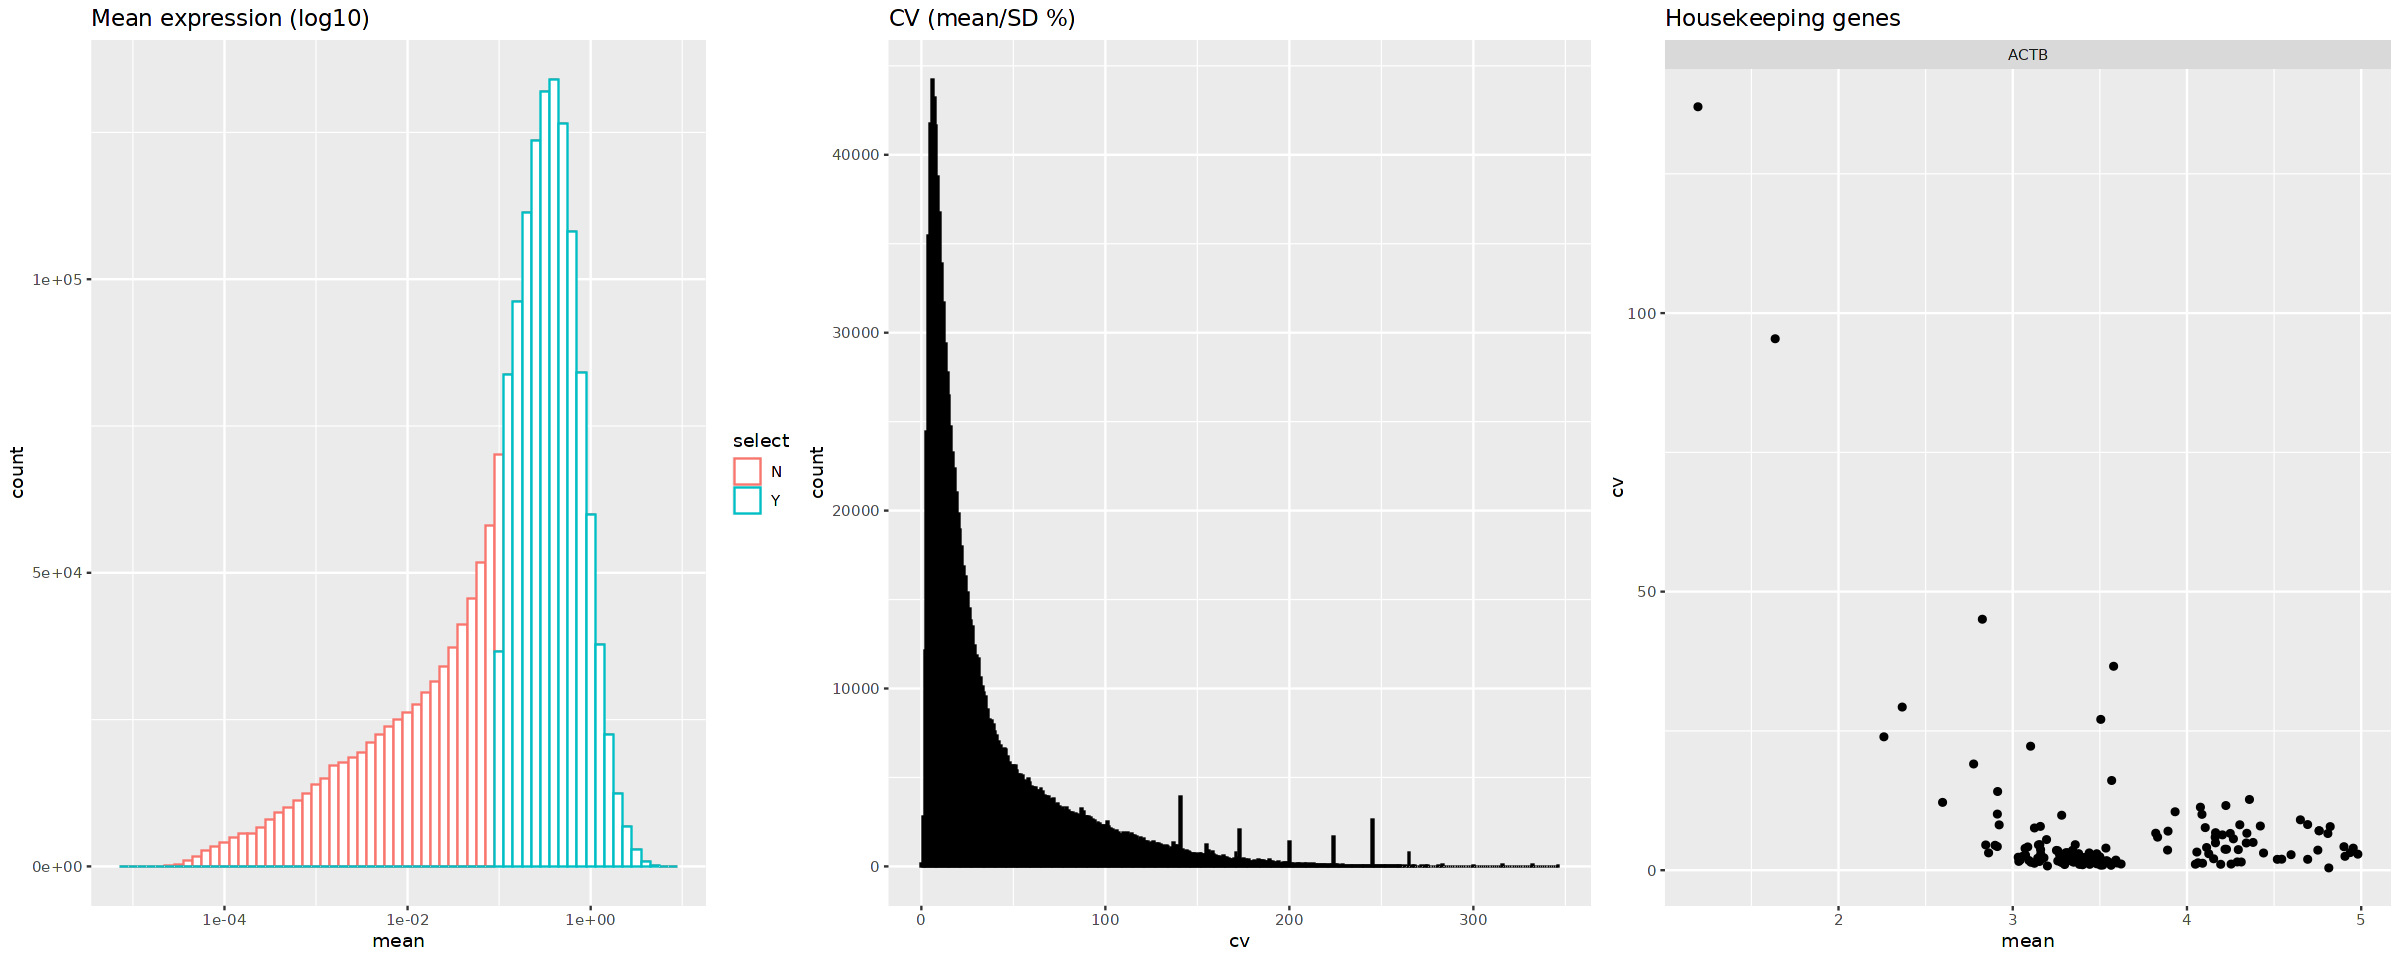

In [20]:
options(repr.plot.width = 20, repr.plot.height = 8)
palmo_obj <- cvCalcSCProfile(data_object=palmo_obj, meanThreshold = 0.1,
    housekeeping_genes= "ACTB",
    fileName="scrna")

In [19]:
#Check the group of interest
head(palmo_obj@curated$anndata)

,Sample,Sample_group,group,orig.ident,nCount_RNA,nFeature_RNA,donor,well,donor2,predicted.celltype.l1.score,⋯,predicted.celltype.l2,predicted.celltype.l3.score,predicted.celltype.l3,Replicate,Pool_Well,Donor,PTID,Time,predicted.celltype.l2.1,Sample_group_i
,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<chr>,<chr>,<chr>,<dbl>,⋯,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
BL05013_033:B_intermediate,BL05013_033,BL05013_033:B_intermediate,B_intermediate,Exp00918_w1_BL05013-033,6654,3198,BL05013,w1,BL05013-033,0.9792252,⋯,CD4 TCM,0.7877114,CD4 TCM_3,BL05013-033,w1,BL05013,BL05013,w1,B_intermediate,B_intermediate:BL05013
BL05013_033:B_memory,BL05013_033,BL05013_033:B_memory,B_memory,Exp00918_w1_BL05013-033,6654,3198,BL05013,w1,BL05013-033,0.9792252,⋯,CD4 TCM,0.7877114,CD4 TCM_3,BL05013-033,w1,BL05013,BL05013,w1,B_memory,B_memory:BL05013
BL05013_033:B_naive,BL05013_033,BL05013_033:B_naive,B_naive,Exp00918_w1_BL05013-033,6654,3198,BL05013,w1,BL05013-033,0.9792252,⋯,CD4 TCM,0.7877114,CD4 TCM_3,BL05013-033,w1,BL05013,BL05013,w1,B_naive,B_naive:BL05013
BL05013_033:CD14_Mono,BL05013_033,BL05013_033:CD14_Mono,CD14_Mono,Exp00918_w1_BL05013-033,6654,3198,BL05013,w1,BL05013-033,0.9792252,⋯,CD4 TCM,0.7877114,CD4 TCM_3,BL05013-033,w1,BL05013,BL05013,w1,CD14_Mono,CD14_Mono:BL05013
BL05013_033:CD16_Mono,BL05013_033,BL05013_033:CD16_Mono,CD16_Mono,Exp00918_w1_BL05013-033,6654,3198,BL05013,w1,BL05013-033,0.9792252,⋯,CD4 TCM,0.7877114,CD4 TCM_3,BL05013-033,w1,BL05013,BL05013,w1,CD16_Mono,CD16_Mono:BL05013
BL05013_033:CD4_CTL,BL05013_033,BL05013_033:CD4_CTL,CD4_CTL,Exp00918_w1_BL05013-033,6654,3198,BL05013,w1,BL05013-033,0.9792252,⋯,CD4 TCM,0.7877114,CD4 TCM_3,BL05013-033,w1,BL05013,BL05013,w1,CD4_CTL,CD4_CTL:BL05013


In [ ]:
#Variance decomposition
featureSet <- c("Replicate", "Donor", "Pool_Well")

palmo_obj <- lmeVariance(data_object=palmo_obj,
    featureSet=featureSet,
    meanThreshold=0.05, cl=4,
    fileName="scrna")

In [ ]:
#Get the result
var_decomp <- palmo_obj@result$variance_decomposition
var_decomp